In [105]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# create initial dataframe. contains data on all companies in fortune 500.

df = pd.read_csv('fortune500.csv')

In [107]:
# first entries in the data frame.

df.head(12)

,Year,Name,Revenue,Rank
0,2021,Walmart,559151.0,1
1,2021,Amazon,386064.0,2
2,2021,Apple,274515.0,3
3,2021,CVS,268706.0,4
4,2021,UnitedHealth Group,257141.0,5
5,2021,Berkshire Hathaway,245510.0,6
6,2021,McKesson,231051.0,7
7,2021,AmerisourceBergen,189893.9,8
8,2021,Alphabet,182527.0,9
9,2021,Exxon Mobil,181502.0,10


In [108]:
df.dtypes

Year         int64
Name        object
Revenue    float64
Rank         int64
dtype: object

In [109]:
# create limited data frame containing data on only companies ranked 1-10 each year.

top10 = df.loc[df['Rank'] <= 10]

In [110]:
top10.head(12)

,Year,Name,Revenue,Rank
0,2021,Walmart,559151.0,1
1,2021,Amazon,386064.0,2
2,2021,Apple,274515.0,3
3,2021,CVS,268706.0,4
4,2021,UnitedHealth Group,257141.0,5
5,2021,Berkshire Hathaway,245510.0,6
6,2021,McKesson,231051.0,7
7,2021,AmerisourceBergen,189893.9,8
8,2021,Alphabet,182527.0,9
9,2021,Exxon Mobil,181502.0,10


In [111]:
# count of times each company has appeared in top 10.

top10_count = pd.Series.to_frame(top10['Name'].value_counts())
print(top10_count)

                    Name
Exxon Mobil           67
General Motors        63
Ford Motor            62
General Electric      59
Mobil                 43
IBM                   42
Texaco                36
Chevron               29
AT&T                  28
Chrysler              28
Walmart               27
Gulf Oil              25
U.S. Steel            15
DuPont                14
Altria Group          13
Berkshire Hathaway    11
Citigroup             10
Conoco                 9
Apple                  9
Esmark                 8
CVS                    7
Amoco                  6
UnitedHealth Group     6
McKesson               6
ITT                    6
AIG                    5
Bank of America        4
Amazon                 4
Valero Energy          3
AmerisourceBergen      3
Hewlett-Packard        3
Phillips 66            3
Bethlehem Steel        2
Armour                 2
Boeing                 2
Enron                  2
Verizon                2
Fannie Mae             2
Sears                  1


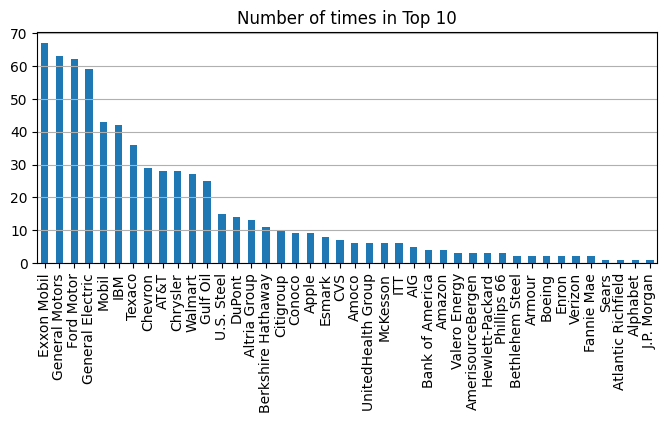

In [112]:
# number of appearances in the top 10 demonstrated as a chart.

top10_count.plot(kind = 'bar', figsize = (8,3), legend = None)
plt.title('Number of times in Top 10')
plt.grid(axis = 'y')
plt.show()

In [124]:
# create dataframe containing top ranking company for each year

number1 = df.loc[df['Rank'] == 1].reset_index()

In [125]:
print(number1)

    index  Year            Name   Revenue  Rank
0       0  2021         Walmart  559151.0     1
1     500  2020         Walmart  523964.0     1
2    1000  2019         Walmart  514405.0     1
3    1500  2018         Walmart  500343.0     1
4    2000  2017         Walmart  485873.0     1
..    ...   ...             ...       ...   ...
62  31000  1959  General Motors    9522.0     1
63  31500  1958  General Motors   10989.8     1
64  32000  1957  General Motors   10796.4     1
65  32500  1956  General Motors   12443.3     1
66  33000  1955  General Motors    9823.5     1

[67 rows x 5 columns]


In [115]:
# determine which companies have reached rank 1, and how amny time

number1_count = (number1['Name'].value_counts())
print(number1_count)

General Motors    37
Walmart           17
Exxon Mobil       13
Name: Name, dtype: int64


In [116]:
# create individual data for each rank 1 company

GM1 = number1.loc[number1['Name'] == 'General Motors']
EM1 = number1.loc[number1['Name'] == 'Exxon Mobil']
WM1 = number1.loc[number1['Name'] == 'Walmart']


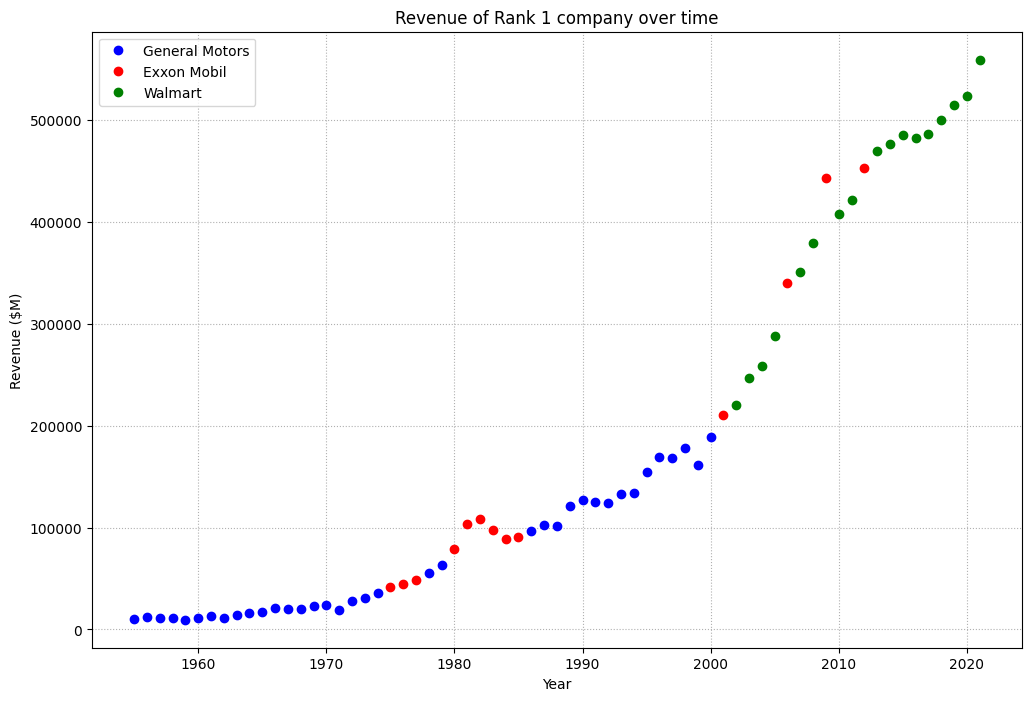

In [163]:
# graph showing the top ranking company of each year and their revenue

plt.figure(figsize = (12,8))
plt.plot(GM1['Year'], GM1['Revenue'], 'o', color = 'blue', label = 'General Motors')
plt.plot(EM1['Year'], EM1['Revenue'], 'o', color = 'red', label = 'Exxon Mobil')
plt.plot(WM1['Year'], WM1['Revenue'], 'o', color = 'green', label = 'Walmart')
plt.title('Revenue of Rank 1 company over time')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()


In [118]:
# create cpi dataframe

cpi = pd.read_csv("cpi.csv", index_col=0)

''' Create a column to determine purchasing power in a given year relative to 2021, based on average consumer price index.
The formula is: ([cpi of ending year]/[cpi of beginning year]) * price
For example: cpi in 1955 = 26.8; cpi in 2021 = 270.970 
270.970/26.8 = 10.11; 10.11*$5 = $50.55
So, $5 in 1955 has approximately the purchasing power of $50.55 in 2021
Data acquired from the Department on Labor Satistics, link found in readme.md '''

cpi["purchasing_power"] = cpi["cpi"].apply(lambda x: (270.970/x))

In [119]:
print(cpi)

          cpi  purchasing_power
Year                           
1955   26.800         10.110821
1956   27.200          9.962132
1957   28.100          9.643060
1958   28.900          9.376125
1959   29.100          9.311684
...       ...               ...
2017  245.120          1.105459
2018  251.107          1.079102
2019  255.657          1.059897
2020  258.811          1.046980
2021  270.970          1.000000

[67 rows x 2 columns]


In [120]:
#create dataframe with all Fortune 500 comapnies with the cpi and purchasing power relative to 2021

df2 = cpi.join(df.set_index("Year"))
print(df2)

         cpi  purchasing_power                    Name  Revenue  Rank
Year                                                                 
1955   26.80         10.110821          General Motors   9823.5     1
1955   26.80         10.110821             Exxon Mobil   5661.4     2
1955   26.80         10.110821              U.S. Steel   3250.4     3
1955   26.80         10.110821        General Electric   2959.1     4
1955   26.80         10.110821                  Esmark   2510.8     5
...      ...               ...                     ...      ...   ...
2021  270.97          1.000000  Camping World Holdings   5446.6   496
2021  270.97          1.000000                  NetApp   5412.0   497
2021  270.97          1.000000       Avis Budget Group   5402.0   498
2021  270.97          1.000000   R.R. Donnelley & Sons   5398.8   499
2021  270.97          1.000000                 Moody's   5371.0   500

[33500 rows x 5 columns]


In [121]:
# calculate revenue adjusted for inflation

df2["adjusted_revenue"] = (df2["Revenue"] * df2["purchasing_power"])
df2.head()

,cpi,purchasing_power,Name,Revenue,Rank,adjusted_revenue
Year,,,,,,
1955,26.8,10.110821,General Motors,9823.5,1,99323.649067
1955,26.8,10.110821,Exxon Mobil,5661.4,2,57241.401418
1955,26.8,10.110821,U.S. Steel,3250.4,3,32864.212239
1955,26.8,10.110821,General Electric,2959.1,4,29918.930112
1955,26.8,10.110821,Esmark,2510.8,5,25386.249104


In [122]:
df2.tail()

,cpi,purchasing_power,Name,Revenue,Rank,adjusted_revenue
Year,,,,,,
2021,270.97,1.0,Camping World Holdings,5446.6,496,5446.6
2021,270.97,1.0,NetApp,5412.0,497,5412.0
2021,270.97,1.0,Avis Budget Group,5402.0,498,5402.0
2021,270.97,1.0,R.R. Donnelley & Sons,5398.8,499,5398.8
2021,270.97,1.0,Moody's,5371.0,500,5371.0


In [130]:
# create a dataframe containing only the top ranking company of each year, the year, and the revenue adjsuted for inflation

adj = df2.loc[df2['Rank'] == 1].reset_index()
adj1 = adj[['Year', 'Name', 'adjusted_revenue']]
print(adj1)

    Year            Name  adjusted_revenue
0   1955  General Motors      99323.649067
1   1956  General Motors     123961.801507
2   1957  General Motors     104110.338363
3   1958  General Motors     103041.733772
4   1959  General Motors      88665.853608
..   ...             ...               ...
62  2017         Walmart     537112.462508
63  2018         Walmart     539921.000649
64  2019         Walmart     545216.140571
65  2020         Walmart     548579.948611
66  2021         Walmart     559151.000000

[67 rows x 3 columns]


In [134]:
# create individual data for each rank 1 company based on adjusted revenue

GM2 = adj1.loc[adj1['Name'] == 'General Motors']
EM2 = adj1.loc[adj1['Name'] == 'Exxon Mobil']
WM2 = adj1.loc[adj1['Name'] == 'Walmart']

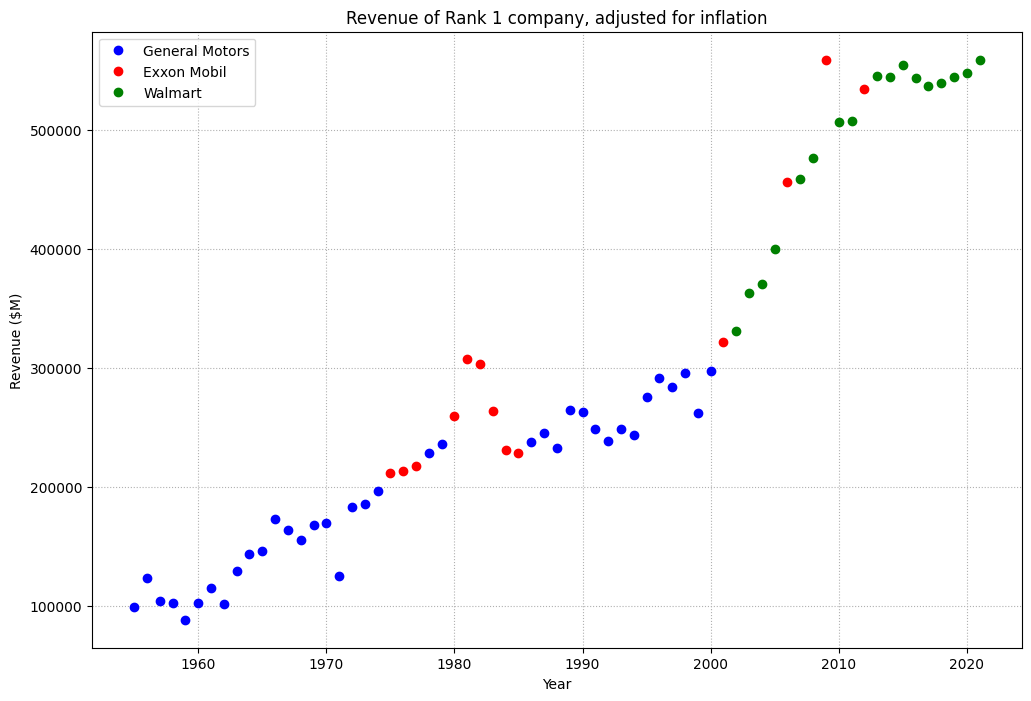

In [161]:
# graph showing the top ranking company of each year and their revenue adjsuted for inflation relative to 2021

plt.figure(figsize = (12,8))
plt.plot(GM2['Year'], GM2['adjusted_revenue'], 'o', color = 'blue', label = 'General Motors')
plt.plot(EM2['Year'], EM2['adjusted_revenue'], 'o', color = 'red', label = 'Exxon Mobil')
plt.plot(WM2['Year'], WM2['adjusted_revenue'], 'o', color = 'green', label = 'Walmart')
plt.title('Revenue of Rank 1 company, adjusted for inflation')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()

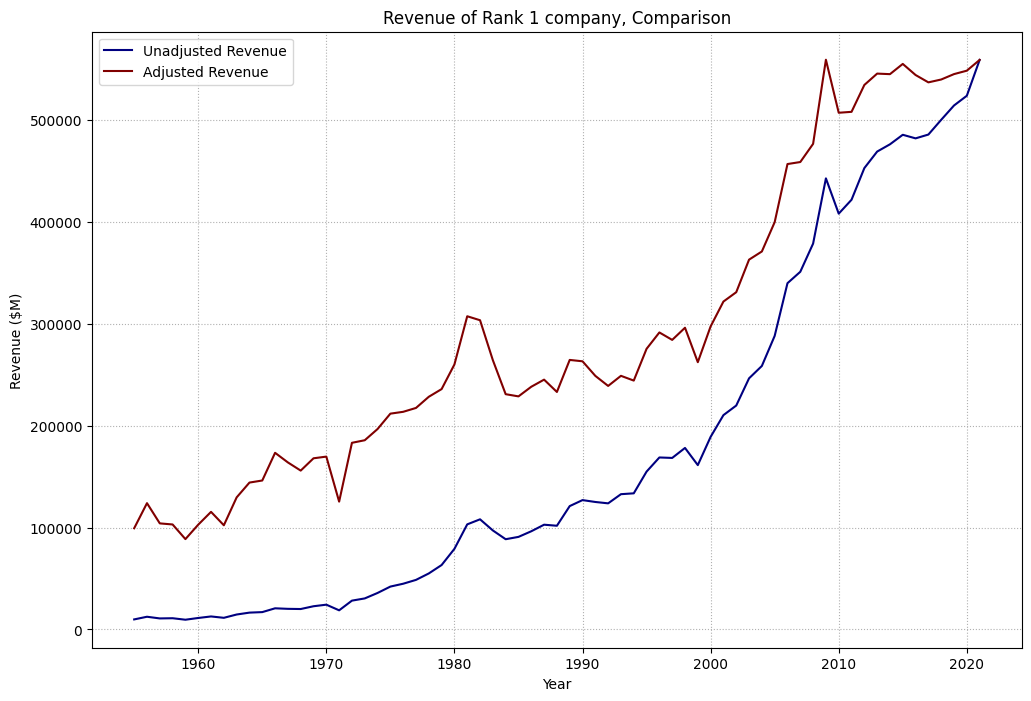

In [162]:
plt.figure(figsize = (12,8))
plt.plot(number1['Year'], number1['Revenue'], color = 'navy', label = 'Unadjusted Revenue' )
plt.plot(adj1['Year'], adj1['adjusted_revenue'], color = 'maroon', label = 'Adjusted Revenue')
plt.title('Revenue of Rank 1 company, Comparison')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()